In [1]:
import os
import numpy as np
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\Jaime\human skin'
pthim = os.path.join(pth, '10x')
umpix = 1
#pthtest = os.path.join(pth, 'testing images')
#pthtestim = os.path.join(pthtest, '5x')
nm = 'CODA_python_25_07_2024'

WS = [[0, 0, 2, 0, 2, 0, 1, 0, 2], [9, 8], 
      [1, 2, 3, 4, 5, 6, 7, 5, 8], 
      [8, 5, 4, 7, 6, 2, 1, 3, 9], []]
numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[102, 51, 0],
                  [1, 109, 157],
                  [81, 179, 93],
                  [250, 213, 164],
                  [255, 51, 0],
                  [255, 244, 25],
                  [255, 189, 222],
                  [255, 255, 255]])
classNames = ['follicle', 'sweat gland', 'oil glandl', 'epidermis','collagen','blood vessel','fat','whitespace']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
numims = 2

Saving model metadata and classification colormap...
Creating Net metadata file...
Plotting cmap took 0.0 minutes and 0.019515514373779297 seconds
Saving metadata took 0.0 minutes and 0.06203818321228027 seconds


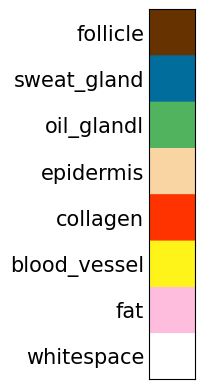

In [2]:
from save_model_metadata import save_model_metadata
save_model_metadata(pthDL, pthim, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate)

In [3]:
from load_annotation_data import load_annotation_data
[ctlist0, numann0] = load_annotation_data(pthDL, pth, pthim, classCheck)

 
Importing annotation data...
Image 1 of 5: OTS-21-11041 - 2021-11-15 12.13.09
Checking parameters took 0.0 minutes and 0.15914678573608398 seconds
 annotation data previously loaded
Image 2 of 5: OTS-21-11041 - 2021-11-15 13.26.29
Checking parameters took 0.0 minutes and 0.1431722640991211 seconds
 annotation data previously loaded
Image 3 of 5: OTS-21-11041 - 2021-11-15 14.36.12
Checking parameters took 0.0 minutes and 0.10608100891113281 seconds
 annotation data previously loaded
Image 4 of 5: OTS-21-11041 - 2021-11-15 15.53.22
Checking parameters took 0.0 minutes and 0.08743882179260254 seconds
 annotation data previously loaded
Image 5 of 5: OTS-21-11041 - 2021-11-15 16.47.58
Checking parameters took 0.0 minutes and 0.10755228996276855 seconds
 annotation data previously loaded


In [4]:
from BB_avg_size import BB_avg_size
avg_size = BB_avg_size(ctlist0)

44128.2311827957
558


In [ ]:
from create_training_tiles import create_training_tiles
create_training_tiles(pthDL, numann0, ctlist0)


Calculating total number of pixels in the training dataset...
 There are 386718100.0 pixels of follicle. This is the most common class.
 There are 49596100.0 pixels of sweat gland, 12% of the most common class.
 There are 114012000.0 pixels of oil glandl, 29% of the most common class.
 There are 193555000.0 pixels of epidermis, 50% of the most common class.
 There are 368207700.0 pixels of collagen, 95% of the most common class.
 There are 29647700.0 pixels of blood vessel, 7% of the most common class.
 There are 99208000.0 pixels of fat, 25% of the most common class.
 There are 265290000.0 pixels of whitespace, 68% of the most common class.

Building training tiles...
Starting time for the while loop


In [ ]:
from train_segmentation_model import train_segmentation_model
train_segmentation_model(pthDL, fine_tune=True)

TensorFlow is using the following GPU: LogicalDevice(name='/device:GPU:0', device_type='GPU')
Starting model training...
Epoch 1/8


In [ ]:
from classify_images import classify_images
classify_images(pthim,pthDL)